In [6]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder

data = pd.read_csv('/content/drive/MyDrive/TH1391_NLMH/Week9_Thuchanh3/credit.csv')

df = pd.DataFrame(data).iloc[:, 1:]

# Sử dụng LabelEncoder để chuyển đổi các giá trị chuỗi thành các giá trị số
le = LabelEncoder()

df['AGE'] = le.fit_transform(df['AGE'])
df['CREDIT_RATING'] = le.fit_transform(df['CREDIT_RATING'])
df['JOB_STATUS'] = le.fit_transform(df['JOB_STATUS'])
df['OWNS_HOUSE'] = le.fit_transform(df['OWNS_HOUSE'])
df['CLASS'] = le.fit_transform(df['CLASS'])

X = df.drop('CLASS', axis=1)
y = df['CLASS']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

clf = DecisionTreeClassifier(random_state=42)

clf.fit(X_train, y_train)

print("Model accuracy: ", clf.score(X_test, y_test))


Model accuracy:  1.0


In [18]:
data

,ID,AGE,JOB_STATUS,OWNS_HOUSE,CREDIT_RATING,CLASS
0,1,Young,False,False,Fair,No
1,2,Young,False,False,Good,No
2,3,Young,True,False,Good,Yes
3,4,Young,True,True,Fair,Yes
4,5,Young,False,False,Fair,No
5,6,Middle,False,False,Fair,No
6,7,Middle,False,False,Good,No
7,8,Middle,True,True,Good,Yes
8,9,Middle,False,True,Excellent,Yes
9,10,Middle,False,True,Excellent,Yes


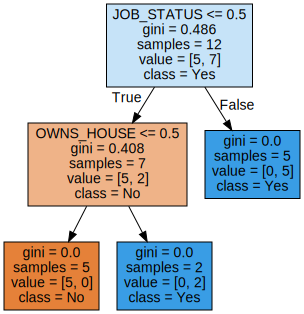

In [19]:
from sklearn import tree
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                                feature_names=X.columns,  
                                class_names=['No', 'Yes'], 
                                filled=True)

graph = graphviz.Source(dot_data, format="png") 
graph


In [24]:
test_data = {
    'AGE': ['Middle'],
    'JOB_STATUS': [True],
    'OWNS_HOUSE': [True],
    'CREDIT_RATING': ['Excellent']
}

test_df = pd.DataFrame(test_data)

# Use the same LabelEncoders to transform the test data
test_df['AGE'] = le.fit_transform(test_df['AGE'])
test_df['CREDIT_RATING'] = le.fit_transform(test_df['CREDIT_RATING'])
test_df['JOB_STATUS'] = le.fit_transform(test_df['JOB_STATUS'])
test_df['OWNS_HOUSE'] = le.fit_transform(test_df['OWNS_HOUSE'])

prediction = clf.predict(test_df)

print("Prediction: ", 'Yes' if prediction[0] == 1 else 'No')

Prediction:  No


In [27]:
# In kết quả dự đoán
for i, data_point in df.iterrows():
    input_data = data_point[:-1].values.reshape(1, -1)
    prediction = clf.predict(input_data)[0]
    if prediction == 0:
        print("Data point {}: Prediction: No".format(i+1))
    else:
        print("Data point {}: Prediction: Yes".format(i+1))

Data point 1: Prediction: No
Data point 2: Prediction: No
Data point 3: Prediction: Yes
Data point 4: Prediction: Yes
Data point 5: Prediction: No
Data point 6: Prediction: No
Data point 7: Prediction: No
Data point 8: Prediction: Yes
Data point 9: Prediction: Yes
Data point 10: Prediction: Yes
Data point 11: Prediction: Yes
Data point 12: Prediction: Yes
Data point 13: Prediction: Yes
Data point 14: Prediction: Yes
Data point 15: Prediction: No


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X